## Important instruction

For programming exercises that only editing, only edit the code as shown in the following format.

```
##############################################

#Edit the following code

var1 = 3
var2 = 4
print(var1 + var4)

##############################################
```

You are open to experimenting with the other parts of code but you will only be awarded points if the question asked is answered which only needs finishing or making changes to the code in the above specified format.

## Question 7: Clustering using Gaussian Mixture Model (GMM)

The objective of this question is to implement Gaussian Mixture Model (GMM) for clustering of a shopping mall dataset. Follow the given instructions below:

1. Load the Dataset from https://raw.githubusercontent.com/InseadDataAnalytics/INSEADAnalytics/master/CourseSessions/Sessions45/data/Mall_Visits.csv

2. **Preprocess the Data**:
   - Drop the 'ID' column since it is not needed for clustering. Only numerical features are retained for clustering purposes.
   - The features are standardized using the ```StandardScaler``` from ```scikit-learn``` to ensure that each feature has a mean of 0 and a standard deviation of 1.

3. **Implement Gaussian Mixture Model (GMM)**:
   - Apply Gaussian Mixture Model (GMM) to the preprocessed data using ```GaussianMixture``` from ```sklearn.mixture```.
   - Try different values for ```n_components``` parameter to find the most appropriate value.
   - The ```random_state``` parameter is set to 99 for reproducibility.
  - Train the model using fit method.

5. **Visualize the Clusters**:
   - Perform Principal Component Analysis (PCA) to reduce the dimensionality of the data to two components for visualization purposes.
   - Plot the PCA-transformed data using a scatter plot.
   - Color each point on the scatter plot according to the cluster assigned by the GMM model. (Use 'viridis' color map to represent different clusters.)
   - The plot should include labels for the x and y axes, as well as a title.


For more information, refer to the following resources:
- Section **7.4: Expectation-Maximization Algorithm** and **7.5: Mixtures of Latent Variable Models** of **Introduction to Machine Learning, 4th Edition, The MIT Press, 2020** by Ethem Alpaydin.
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
- https://www.analyticsvidhya.com/blog/2021/05/a-comprehensive-guide-to-expectation-maximization-algorithm/
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

Text(0, 0.5, 'Principle Component 2')

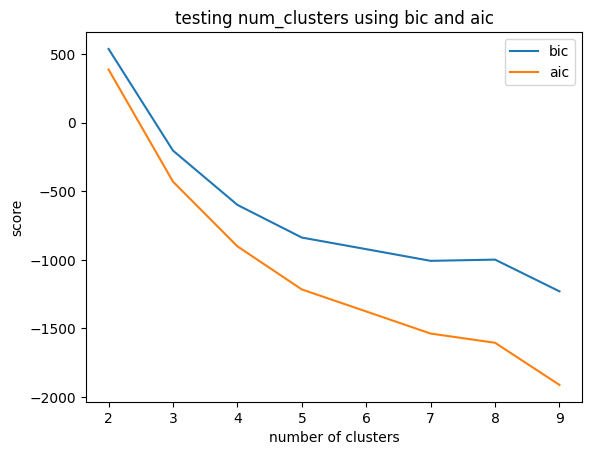

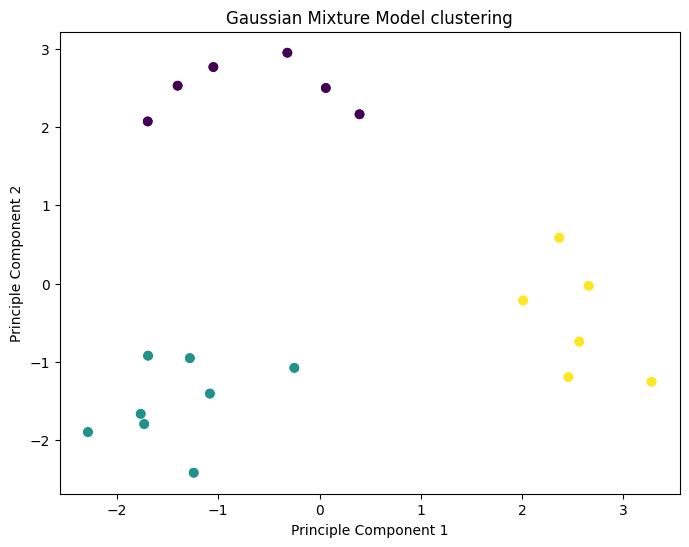

In [56]:
############################################################
#Write your code here
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt


data = pd.read_csv('https://raw.githubusercontent.com/InseadDataAnalytics/INSEADAnalytics/master/CourseSessions/Sessions45/data/Mall_Visits.csv').drop(columns = ['ID'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# test components
bic = []
aic = []
for num_cluster in range(2,10):
  gmm = GaussianMixture(n_components=num_cluster, random_state=99).fit(X_scaled)
  bic.append(gmm.bic(X_scaled))
  aic.append(gmm.aic(X_scaled))


plt.plot(range(2,10),bic, label ="bic")
plt.plot(range(2,10),aic, label="aic")
plt.title('testing num_clusters using bic and aic')
plt.xlabel('number of clusters')
plt.ylabel('score')
plt.legend()

gmm = GaussianMixture(n_components=3, random_state=99).fit(X_scaled)
clusters = gmm.predict(X_scaled)


pca = PCA(n_components=2)
pca_x = pca.fit_transform(X_scaled)

plt.figure(figsize = (8,6))
plt.scatter(pca_x[:,0],pca_x[:,1],c=clusters,cmap='viridis')
plt.title('Gaussian Mixture Model clustering')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')


############################################################

In [39]:
################## FOR REFERENCE ONLY ##################

# For additional analysis on the clusters...

# Assign cluster labels to the original dataset
data['Cluster'] = gmm.predict(X_scaled)

# Generate summary statistics for each cluster
summary_stats = data.groupby('Cluster').describe()

# Display the summary statistics
summary_stats.head()

V1                                                  V2            \
        count      mean       std  min  25%  50%   75%  max count      mean   
Cluster                                                                       
0        12.0  1.666667  0.492366  1.0  1.0  2.0  2.00  2.0  12.0  3.000000   
1        16.0  5.750000  1.000000  4.0  5.0  6.0  6.25  7.0  16.0  3.625000   
2        12.0  3.500000  0.522233  3.0  3.0  3.5  4.00  4.0  12.0  5.833333   

         ...   Income          Mall.Visits                                 \
         ...      75%      max       count  mean       std  min  25%  50%   
Cluster  ...                                                                
0        ...  60000.0  70000.0        12.0  1.00  0.852803  0.0  0.0  1.0   
1        ...  66250.0  80000.0        16.0  3.25  0.683130  2.0  3.0  3.0   
2        ...  35000.0  40000.0        12.0  5.50  1.000000  4.0  5.0  5.5   

                   
         75%  max  
Cluster            
0        2.0  2.0  
1        4.0  4.0  
2        6.0  7.0  

[3 rows x 64 columns]

### **Answer the following question with a brief reasoning.**

What are the reasonable number of clusters and upon examining the plot (or, along with summary_stats) were you able to observe the most influencing features for the clustering?

While testing different numbers of clustering using AIC and BIC. As there is no clear elbow in both the aic and bic graphs, I have chosen 3 clusters based on a rough estimate of an elbow in the graph as well as a visual analysis of the PCA reduced graph.

## Question 8: Nonparametric Density Estimation - Histogram

The objective of this question is to implement Histogram technique of non-parametric density estimation for analyzing the distribution of a given dataset. Follow the given instructions below:

1. For importing data, use ```fetch_openml``` from ```sklearn.datasets```.
  - Set the ```data_id``` to 506.
  - Assign ```'target'``` attribute of the dataset to ```data``` variable.
2. The function ```hist_pdf``` is defined with x, data and n_bins as parameters.
x is defined as the value at which the probability density function (PDF) will be evaluated, data parameter denotes the dataset for which the density estimation will be performed and n_bins denotes the number of bins to use for the histogram calculation.
  
  - Set ```n_bins``` to 5.

  - Use NumPy's ```np.histogram``` function to calculate the histogram of the input data. Specify the number of bins (bins) using the ```n_bins``` parameter. Set the ```density``` parameter to ```True``` to compute the normalized density (PDF).
  
  - Calculate Bin Width: Compute the width of each bin (```bin_width```) by subtracting the position of the first bin from the position of the second bin.This step ensures that we know the size of each bin in our histogram.

3. Plot the Density Estimation:
  - Provide the ```xvals``` array as the x-values of the plot and the ```pdf``` array (calculated PDF values) as the y-values of the plot.
  - Add appropriate labels, title and legend to plot.

For more information, refer to the following resources:
- Section **8.2.1: Histogram Estimator** of **Introduction to Machine Learning, 4th Edition, The MIT Press, 2020** by Ethem Alpaydin.
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html
- https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
- https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Text(0.5, 1.0, 'Nonparametric Density Estimation - Histogram')

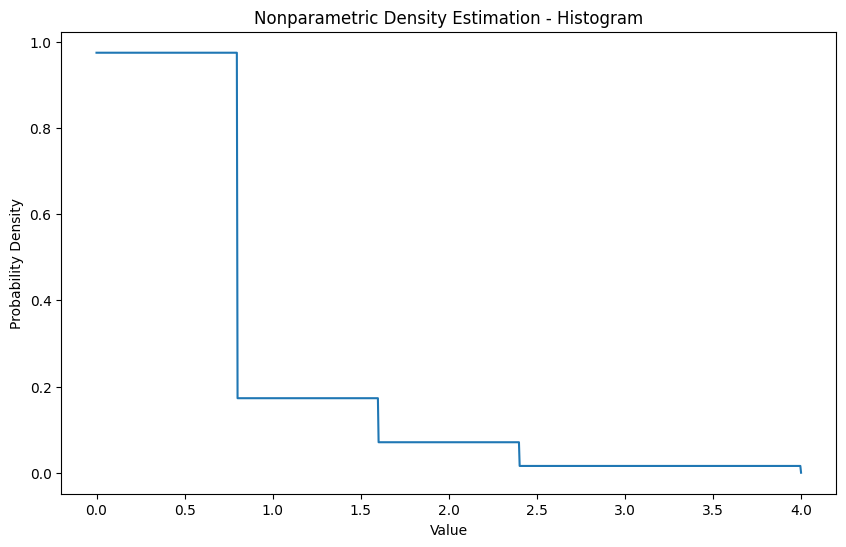

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

############################################################
#Write your code here
#Load data
all_data = fetch_openml(data_id = 506)
data = all_data.target
############################################################


############################################################
#Write your code here
def hist_pdf(x, data, n_bins=5):
    hist, bins = np.histogram(data,bins=n_bins,density=True)
    bin_width = bins[1] - bins[0]
############################################################
    bin_index = np.digitize(x, bins) - 1
    pdf = hist[bin_index] if 0 <= bin_index < n_bins else 0
    return pdf

# histogram
xvals = np.linspace(min(data), max(data), 1000)
pdf = [hist_pdf(x, data) for x in xvals]


############################################################
#Write your code here
#Plot the Density Estimation
plt.figure(figsize=(10, 6))
plt.plot(xvals, pdf, label='Density Estimation')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Nonparametric Density Estimation - Histogram')

############################################################

## Question 9: Outlier Detection - Local outlier factor (LOF)

Implement outlier detection using the Local Outlier Factor (LOF) algorithm on iris dataset.

1. Load iris dataset using `load_iris` and assign `iris.data` to variable X.

2. Implement LOF Algorithm:
   - Instantiate the `LocalOutlierFactor` class with appropriate parameters. Experiment and adjust the `n_neighbors` and `contamination` parameters based on the characteristics of the outliers.
   - Fit the LOF model to the scaled features.
   - Use the fitted LOF model to predict outliers (`outlier_scores`) in the dataset.

3. Run 3 experiments varying `n_neighbors` and `contamination` parameters and find the set of parameters that best identifies the outliers.

For more information, refer to the following resources:

- Sections **8.7: Outlier Detection**  of **Introduction to Machine Learning, 4th Edition, The MIT Press, 2020** by Ethem Alpaydin.
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
- https://www.geeksforgeeks.org/novelty-detection-with-local-outlier-factor-lof-in-scikit-learn/

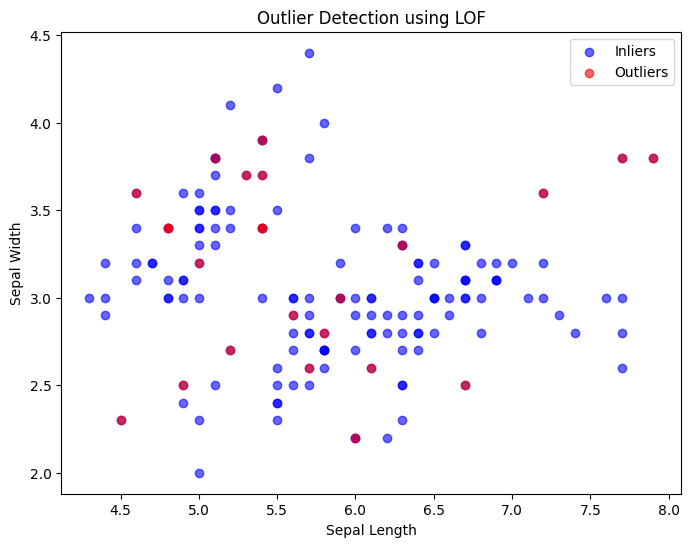

Number of outliers detected: 24


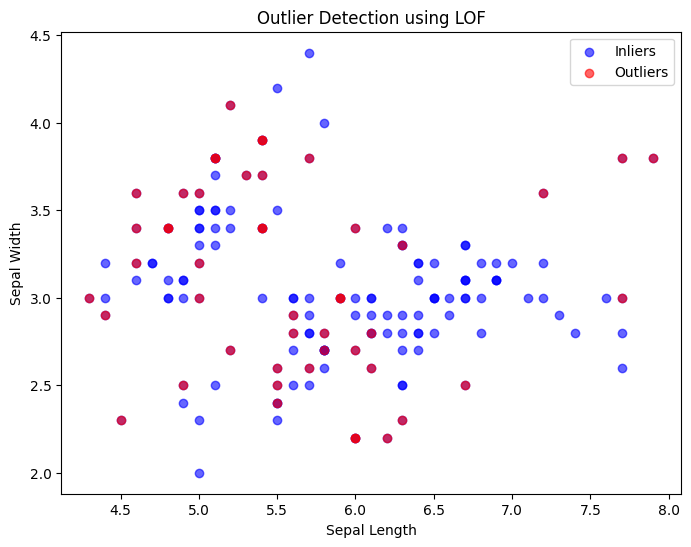

Number of outliers detected: 48


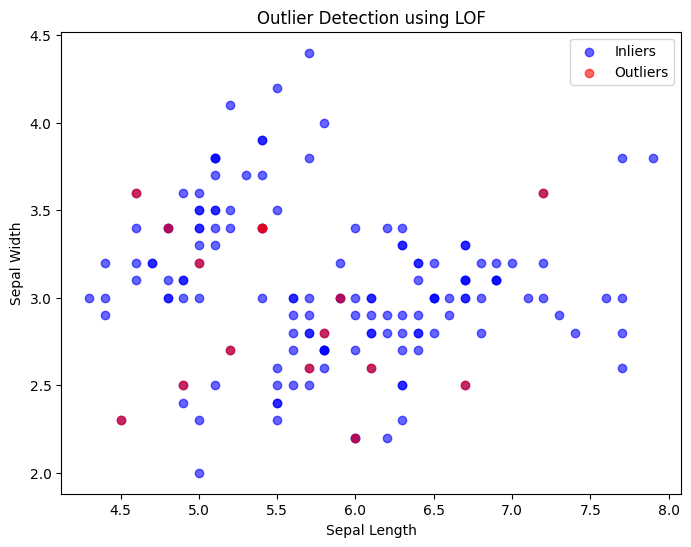

Number of outliers detected: 15


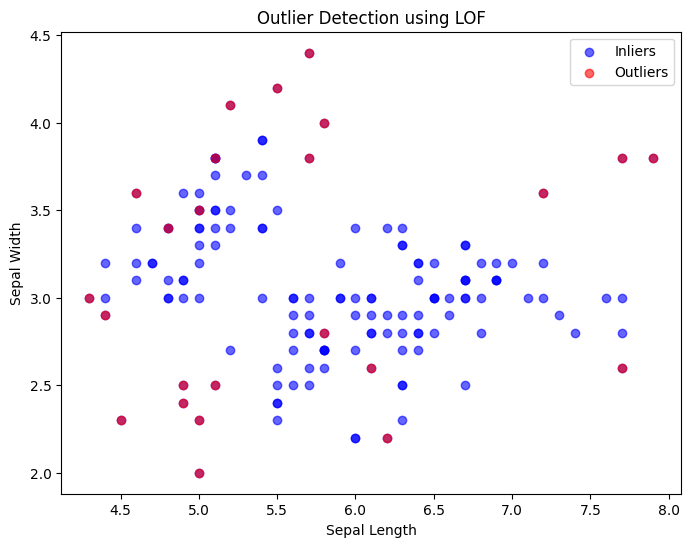

Number of outliers detected: 24


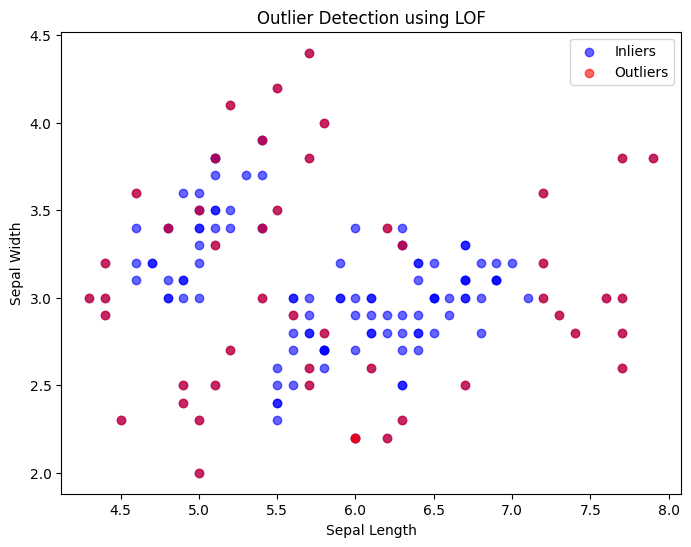

Number of outliers detected: 48


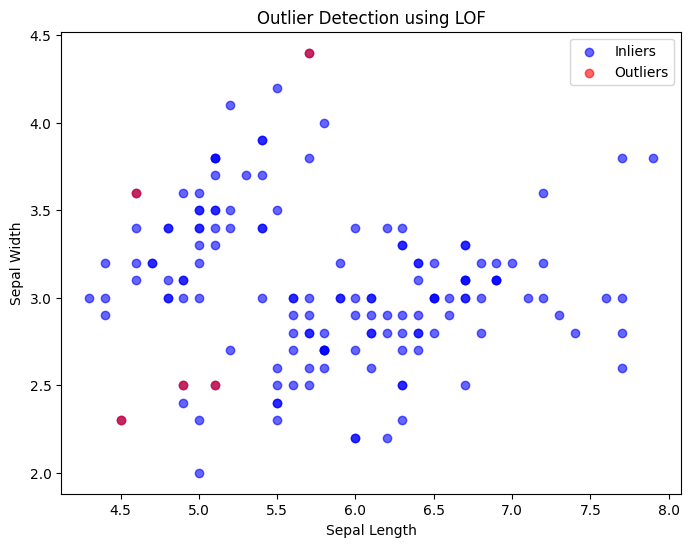

Number of outliers detected: 5


In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import LocalOutlierFactor

############################################################
#Write your code here
# Load the Iris dataset
iris = load_iris()
X = iris.data

experiments = [
    {"n_neighbors": 2, "contamination": .16},
    {"n_neighbors": 2, "contamination": .32},
    {"n_neighbors": 2, "contamination": "auto"},
    {"n_neighbors": 10, "contamination": .16},
    {"n_neighbors": 10, "contamination": .32},
    {"n_neighbors": 10, "contamination": "auto"}
]

# Implement LOF algorithm
for exp in experiments:
  lof = LocalOutlierFactor(n_neighbors=exp["n_neighbors"], contamination=exp["contamination"])
  outlier_scores = lof.fit_predict(X)
############################################################
  outlier_mask = outlier_scores == -1

  # Visualize outliers
  plt.figure(figsize=(8, 6))
  plt.scatter(X[:, 0], X[:, 1], c='blue', alpha=0.6, label='Inliers')
  plt.scatter(X[outlier_mask][:, 0], X[outlier_mask][:, 1], c='red', alpha=0.6, label='Outliers')
  plt.xlabel('Sepal Length')
  plt.ylabel('Sepal Width')
  plt.title('Outlier Detection using LOF')
  plt.legend()
  plt.show()

  # Discuss findings and effectiveness of LOF algorithm
  print("Number of outliers detected:", np.sum(outlier_mask))

### **Answer the following question with a brief reasoning.**
Mention the set of values for the parameters n_neighbors and contamination that performed the best in outlier detection, along with the reason for why it outperformed the other two experiments.

Given my experiments I believe that the parameters of n_neighbors=10 and contamination = "auto" offered the best results. I tested different values of contamination by dividing the range of 0,.5 into thirds, such that the lower one third and upper one third values would not offer too extreme values. It seems that the auto value seems to perfrom better, meaning that an optimal value is around .25. n_neighbors set to higher value made it a bit less sensitive to surronding neighbots, which reduces the amount of outliers. Picking the correct amount of outliers is impacted by the specific use case of the algorthm where mis classifying a outlier may have a larger impact.

In [76]:
!jupyter nbconvert --to html /content/Yeung_Assignment05_Practical.ipynb

[NbConvertApp] WARNING | pattern '/content/Yeung_Assignment05_Practical.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answ

In [ ]:
from google.colab import files
files.download('/content/Yeung_Assignment05_Practical.html')